# Amazing Supermarkets and Where to Find Them

The findings of this hackathon resulted from a collaborative effort from Angelica Collanto, Jose Medriano, and Kemp Po. 

The results were summarized by Angelica Collanto

In this Hackathon, the group made use of the Family Income and Expenditure of Philippine households per region to determine:
1. Which region would be the best to construct a supermarket?
2. What type of supermarket should be built in the specified region?
3. What kind of goods are most appropriate to sell in the supermarket?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,stats
import seaborn as sns
pd.options.display.max_columns = None

%matplotlib inline

# I. Data Preparation

The CSV file contains variables from the latest Family Income and Expenditure Survey (FIES) in the Philippines. It contains more than 40k observations and 60 variables which is primarily comprised of the household income and expenditures of that specific household.

In [2]:
df = pd.read_csv('Family Income and Expenditure.csv')

In [3]:
df.shape

(41544, 60)

In [4]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,2.092154e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,1.381686e+04,5.437624e+04,51.381451,4.635182,0.410216,1.362579,1.272699,55.603360,20.125505,1.788008,0.890815,0.856875,0.435225,0.162141,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,3.937152e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,4.764378e+04,1.471428e+05,14.166081,2.280252,0.694390,1.408000,1.149152,55.023165,14.295452,1.105664,0.311875,0.646306,0.560125,0.389108,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,6.000000e+03,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000,0.000000,25.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.080000e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1

In [5]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

## Selecting relevant columns
Here the group selected relevant attributes to solve the questions

In [6]:
df = df[['Region','Total Household Income','Total Food Expenditure','Bread and Cereals Expenditure',
         'Total Rice Expenditure','Meat Expenditure','Total Fish and  marine products Expenditure',
         'Fruit Expenditure', 'Vegetables Expenditure','Special Occasions Expenditure',
         'Crop Farming and Gardening expenses','Alcoholic Beverages Expenditure',
         'Total Number of Family members','Agricultural Household indicator',
         'Tobacco Expenditure','Clothing, Footwear and Other Wear Expenditure']].copy()

We can observe that the distribution is heavily skewed, thus we remove the outliers

Text(0.5, 1.0, 'Income Distribution')

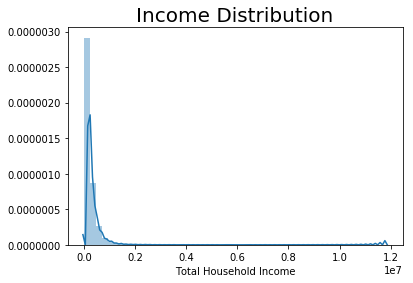

In [7]:
sns.distplot(df['Total Household Income'])
plt.title('Income Distribution', fontsize=20)

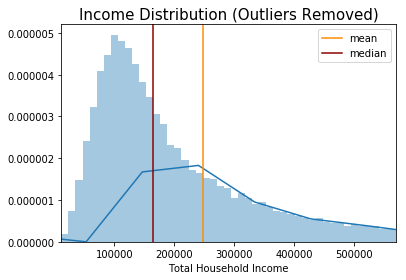

In [8]:
#Removing Outliers
percentiles = np.percentile(df['Total Household Income'], q=[25, 50, 75])
iqr = percentiles[-1] - percentiles[0]
upper_whisker =  min(df['Total Household Income'].max(), percentiles[-1] + iqr * 1.5)
lower_whisker = max(df['Total Household Income'].min(), percentiles[0] - iqr * 1.5)


sns.distplot(df['Total Household Income'], bins=1000)
plt.xlim(lower_whisker, upper_whisker)
plt.title('Income Distribution (Outliers Removed)', fontsize=15)
plt.axvline(df['Total Household Income'].mean(), color='darkorange')
plt.axvline(df['Total Household Income'].median(), color='darkred')
plt.legend(['mean','median'])

<h1> II. Exploratory Data Analysis </h1>

In [9]:
df.head()

,Region,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Alcoholic Beverages Expenditure,Total Number of Family members,Agricultural Household indicator,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure"
0,CAR,480332,117848,42140,38300,24676,16806,3325,13460,7200,19370,0,4,0,0,4607
1,CAR,198235,67766,17329,13008,17434,11073,2035,7833,1500,0,960,3,0,2132,8230
2,CAR,82785,61609,34182,32001,7783,2590,1730,3795,500,0,270,6,1,4525,2735
3,CAR,107589,78189,34030,28659,10914,10812,690,7887,500,15580,480,3,0,0,1390
4,CAR,189322,94625,34820,30167,18391,11309,1395,11260,1000,18887,1040,4,0,0,4620


In [10]:
df.dtypes

Region                                           object
Total Household Income                            int64
Total Food Expenditure                            int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Special Occasions Expenditure                     int64
Crop Farming and Gardening expenses               int64
Alcoholic Beverages Expenditure                   int64
Total Number of Family members                    int64
Agricultural Household indicator                  int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
dtype: object

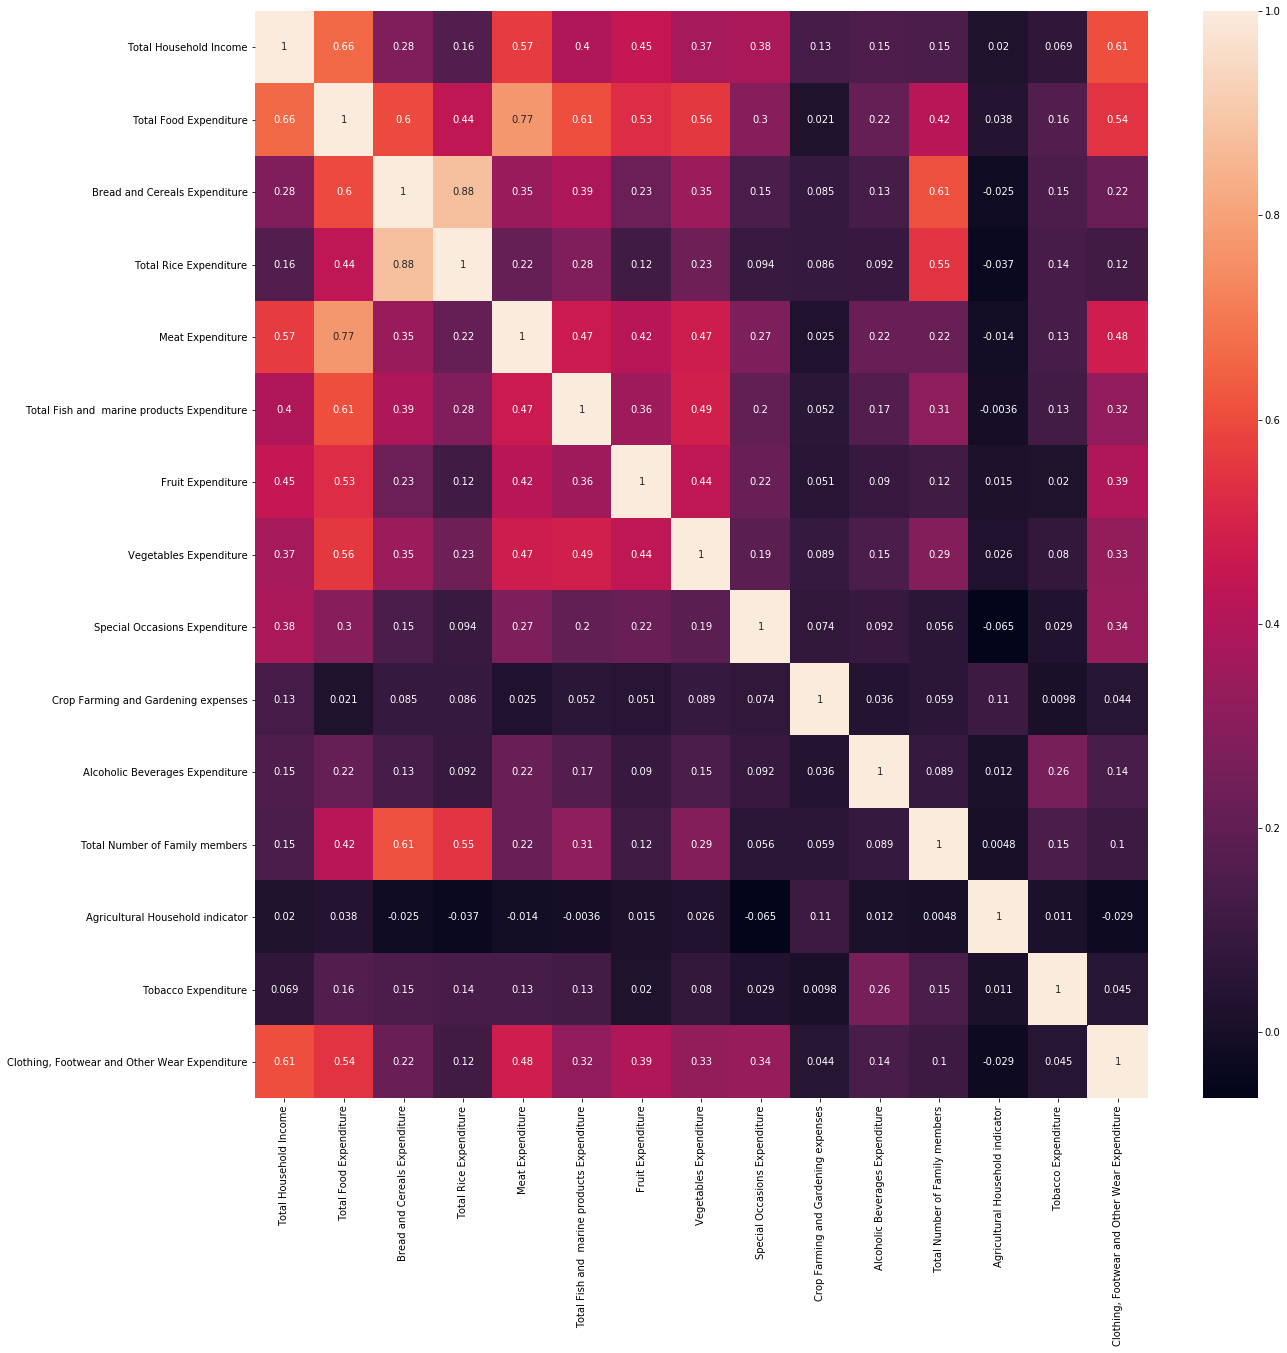

In [11]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True)

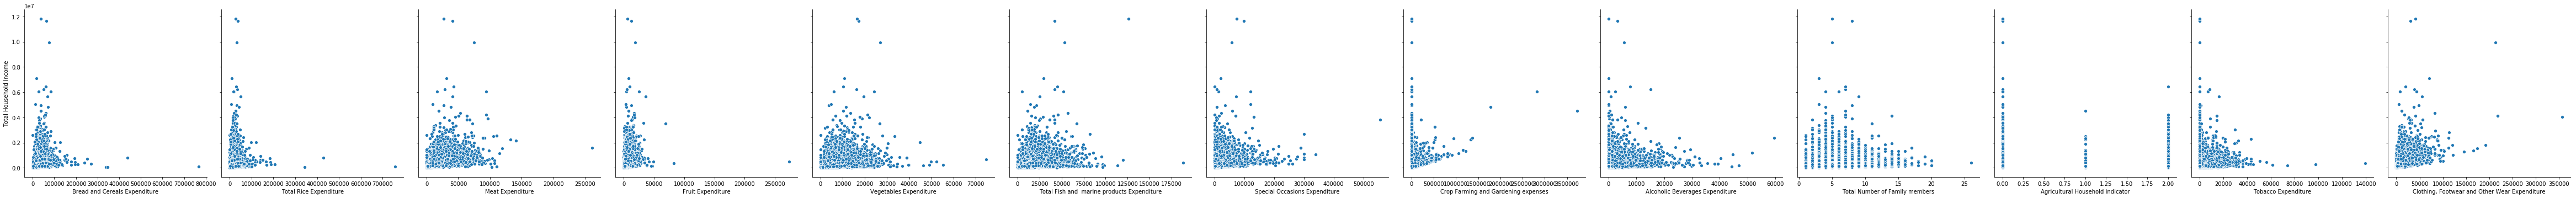

In [12]:
#Pair Plot
sns.pairplot(df,x_vars=["Bread and Cereals Expenditure",
                        "Total Rice Expenditure", "Meat Expenditure",
                        "Fruit Expenditure","Vegetables Expenditure",
                        "Total Fish and  marine products Expenditure",
                        "Special Occasions Expenditure","Crop Farming and Gardening expenses",
                        "Alcoholic Beverages Expenditure","Total Number of Family members",
                        "Agricultural Household indicator","Tobacco Expenditure",
                        "Clothing, Footwear and Other Wear Expenditure"],
             y_vars = ["Total Household Income"],
             diag_kind="kde", height = 5)

In [13]:
#Create new volumn for Total Consumption Goods
df["ConsumptionGoods"]=df["Bread and Cereals Expenditure"]+df["Total Rice Expenditure"]+df["Meat Expenditure"]+df["Total Fish and  marine products Expenditure"]+df["Fruit Expenditure"]+df["Vegetables Expenditure"]+df["Alcoholic Beverages Expenditure"]+df["Tobacco Expenditure"]+df["Clothing, Footwear and Other Wear Expenditure"]
df["Expense_for_each_member"] = df["ConsumptionGoods"]/df['Total Number of Family members']

In [14]:
df.Expense_for_each_member.describe()

count     41544.000000
mean      19451.791699
std       10497.520991
min           0.000000
25%       13006.335714
50%       17220.750000
75%       23189.678571
max      389838.500000
Name: Expense_for_each_member, dtype: float64

In [15]:
df.ConsumptionGoods.describe()

count    4.154400e+04
mean     8.029076e+04
std      4.141706e+04
min      0.000000e+00
25%      5.286375e+04
50%      7.419650e+04
75%      9.988375e+04
max      1.559354e+06
Name: ConsumptionGoods, dtype: float64

In [16]:
#Get percentages of each type of commodity from total consumption goods
df["BreadPercent"]=df["Bread and Cereals Expenditure"]/df["ConsumptionGoods"]*100
df["RicePercent"]=df["Total Rice Expenditure"]/df["ConsumptionGoods"]*100
df["MeatPercent"]=df["Meat Expenditure"]/df["ConsumptionGoods"]*100
df["MarinePercent"]=df["Total Fish and  marine products Expenditure"]/df["ConsumptionGoods"]*100
df["FruitPercent"]=df["Fruit Expenditure"]/df["ConsumptionGoods"]*100
df["VegetablePercent"]=df["Vegetables Expenditure"]/df["ConsumptionGoods"]*100
df["AlcoholPercent"]=df["Alcoholic Beverages Expenditure"]/df["ConsumptionGoods"]*100
df["TobaccoPercent"]=df["Tobacco Expenditure"]/df["ConsumptionGoods"]*100
df["ClothingPercent"]=df["Clothing, Footwear and Other Wear Expenditure"]/df["ConsumptionGoods"]*100

In [17]:
df.head()

,Region,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Alcoholic Beverages Expenditure,Total Number of Family members,Agricultural Household indicator,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",ConsumptionGoods,Expense_for_each_member,BreadPercent,RicePercent,MeatPercent,MarinePercent,FruitPercent,VegetablePercent,AlcoholPercent,TobaccoPercent,ClothingPercent
0,CAR,480332,117848,42140,38300,24676,16806,3325,13460,7200,19370,0,4,0,0,4607,143314,35828.500000,29.403966,26.724535,17.218136,11.726698,2.320080,9.391964,0.000000,0.000000,3.214620
1,CAR,198235,67766,17329,13008,17434,11073,2035,7833,1500,0,960,3,0,2132,8230,80034,26678.000000,21.652048,16.253092,21.783242,13.835370,2.542669,9.787090,1.199490,2.663868,10.283130
2,CAR,82785,61609,34182,32001,7783,2590,1730,3795,500,0,270,6,1,4525,2735,89611,14935.166667,38.144871,35.711018,8.685318,2.890270,1.930567,4.234971,0.301302,5.049603,3.052081
3,CAR,107589,78189,34030,28659,10914,10812,690,7887,500,15580,480,3,0,0,1390,94862,31620.666667,35.873163,30.211254,11.505134,11.397609,0.727372,8.314183,0.505998,0.000000,1.465286
4,CAR,189322,94625,34820,30167,18391,11309,1395,11260,1000,18887,1040,4,0,0,4620,113002,28250.500000,30.813614,26.695988,16.274933,10.007787,1.234491,9.964425,0.920338,0.000000,4.088423


## ANOVA Test

### ANOVA test for Economic Classes

From this test, we obtain a p-value of 0.038, which we can consider statistically significant. This means that the economic class have a significance on consumption goods expenditure.

In [89]:
df_anova_class =pd.DataFrame([df.groupby('Class')["Bread and Cereals Expenditure"].sum(),df.groupby('Class')["Total Rice Expenditure"].sum(),df.groupby('Class')["Meat Expenditure"].sum(),df.groupby('Class')["Total Fish and  marine products Expenditure"].sum(),df.groupby('Class')["Fruit Expenditure"].sum(),df.groupby('Class')["Vegetables Expenditure"].sum(),df.groupby('Class')["Alcoholic Beverages Expenditure"].sum(),df.groupby('Class')["Tobacco Expenditure"].sum(),df.groupby('Class')["Clothing, Footwear and Other Wear Expenditure"].sum()])
stats.f_oneway(df_anova_class.High.values, df_anova_class.Middle.values, df_anova_class.Low.values)

F_onewayResult(statistic=3.751831602386216, pvalue=0.038212216484114735)

### ANOVA Test for Regions

This test, on the other hand, shows that the region has no significance on expenditure consumption goods.

In [90]:
df_anova_region=pd.DataFrame([df.groupby('Region')["Bread and Cereals Expenditure"].sum(),df.groupby('Region')["Total Rice Expenditure"].sum(),df.groupby('Region')["Meat Expenditure"].sum(),df.groupby('Region')["Total Fish and  marine products Expenditure"].sum(),df.groupby('Region')["Fruit Expenditure"].sum(),df.groupby('Region')["Vegetables Expenditure"].sum(),df.groupby('Region')["Alcoholic Beverages Expenditure"].sum(),df.groupby('Region')["Tobacco Expenditure"].sum(),df.groupby('Region')["Clothing, Footwear and Other Wear Expenditure"].sum()])
stats.f_oneway(df_anova_region[' ARMM'].values,df_anova_region['CAR'].values,df_anova_region['Caraga'].values,
               df_anova_region['I - Ilocos Region'].values, df_anova_region['II - Cagayan Valley'].values,
               df_anova_region['III - Central Luzon'].values, df_anova_region['IVA - CALABARZON'].values,
               df_anova_region['IVB - MIMAROPA'].values,df_anova_region['IX - Zasmboanga Peninsula'].values,
               df_anova_region['NCR'].values, df_anova_region['V - Bicol Region'].values,
               df_anova_region['VI - Western Visayas'].values, df_anova_region['VII - Central Visayas'].values,
               df_anova_region['VIII - Eastern Visayas'].values, df_anova_region['X - Northern Mindanao'].values,
               df_anova_region['XI - Davao Region'].values,df_anova_region['XII - SOCCSKSARGEN'].values)

F_onewayResult(statistic=1.4731390841052692, pvalue=0.11838447102673656)

# Q1 Which region should we build a supermarket?

To answer the first question, we wanted to see which regions had high expenditure on consumption goods.

## Total Household Income vs Total Consumption Goods Spending

There are 2 notable regions from these two graphs.
1. ARMM
 - In total household income, it falls second to the last, but in expenditure on consumption goods it falls in the middle
 - This means that households in the region mostly use their income on consumption goods.
2. NCR
 - Total Household Income is around 500,000,000 pesos greater than IVA-CALABARZON, but on consumption goods expenditure, NCR and Region IV only have a small difference.
 - This means that NCR spends more on other facets of living expenses than consumption goods.
 - This may be for leisure or housing which we know to be more expensive in this area.

Text(0.5, 1.0, 'Total Household Income in each Region')

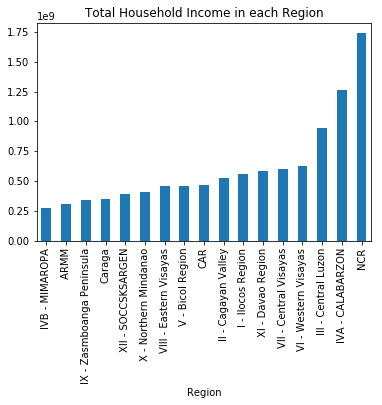

In [18]:
df.groupby('Region')['Total Household Income'].sum().sort_values().plot.bar()
plt.title("Total Household Income in each Region")

Text(0.5, 1.0, 'Expenditures on Consumption Goods per Region')

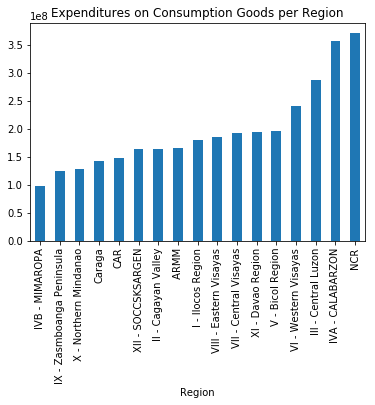

In [19]:
df.groupby('Region')['ConsumptionGoods'].sum().sort_values().plot.bar()
plt.title('Expenditures on Consumption Goods per Region')

Here, the correlation of household income and consumption goods has a strong correlation of 0.54.

However, we also see from the scatterplot that most of the values for consumption goods is below 300,000 Pesos even if the total household income increases.

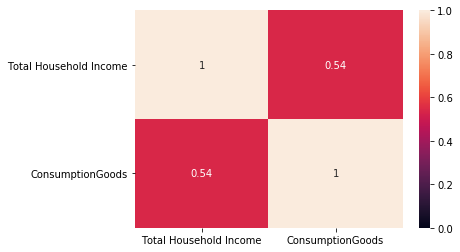

In [20]:
df3=df[["Total Household Income", "ConsumptionGoods"]].copy()
sns.heatmap(df3.corr(), annot=True, vmin=0)

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


array([[1.        , 0.54052982],
       [0.54052982, 1.        ]])

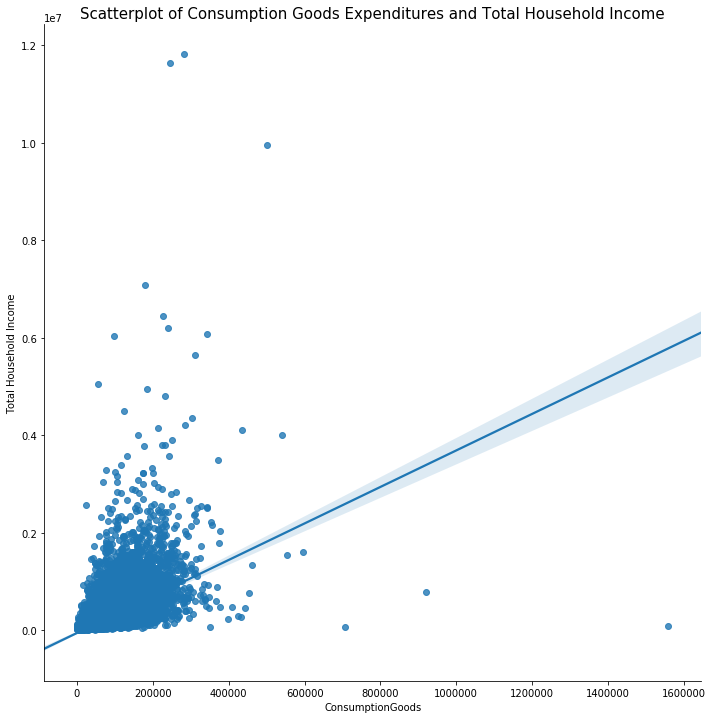

In [21]:
sns.lmplot('ConsumptionGoods', 'Total Household Income', df, palette="Set2",size=10)
plt.title('Scatterplot of Consumption Goods Expenditures and Total Household Income', fontsize=15)
np.corrcoef(df["ConsumptionGoods"], df["Total Household Income"])

# Q2 What type of supermarket should be built in a region?

Here we now look at a) Economic class composition of each region, b) consumption goods expenditure of each economic class to see what type of supermarket should be built there.

When you say **type**, we ask would it be:
1. supermarkets such as Rustans or Merkado (with loads of imported goods, Gourmet products and generally more expensive)
2. the usual SM supermarkets (with a mix of local and imported goods)
3. Puregold (with more local goods that are much cheaper)?

In [23]:
def house_class(x):
    if x > 594317:
        return "High"
    elif x > 142975 and x <= 594317:
        return "Middle"
    else:
        return "Low"
df['Class'] = df['Total Household Income'].apply(lambda x: house_class(x))

##  Expenditure of each Economic class of each region

We see here that each of the four regions we have selected, there is a specific economic class that has the highest expenditure.

For NCR and CALABARZON, the Middle class spends the most. This means that we should focus efforts on building supermarkets that cater to more to the middle class than other economic classes.

While in ARMM, the lower class spends the most. We build a supermarket that would cater to the lower class, which means we also put products that are not so high-value.

Finally, for MIMAROPA, we see that the consumption for the middle and the upper class are almost equal. This means we attempt satisfy both needs.

In [25]:
lists = ["NCR"," ARMM","IVB - MIMAROPA","IVA - CALABARZON"]

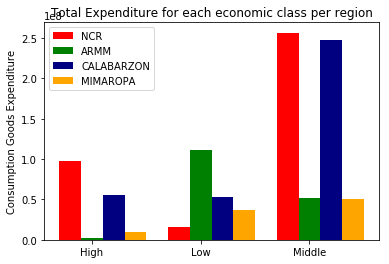

In [78]:
## Expenditure on products per gender
NCR = df.loc[df.Region=="NCR"].groupby('Class')['ConsumptionGoods'].sum().values
ARMM = df.loc[df.Region==" ARMM"].groupby('Class')['ConsumptionGoods'].sum().values
CALABARZON = df.loc[df.Region=="IVA - CALABARZON"].groupby('Class')['ConsumptionGoods'].sum().values
MIMAROPA = df.loc[df.Region=="IVB - MIMAROPA"].groupby('Class')['ConsumptionGoods'].sum().values

fig, ax = plt.subplots()

index = np.arange(df['Class'].nunique())
bar_width = 0.2

N_plt = plt.bar(index,NCR, bar_width,color='red', label='NCR')
A_plt = plt.bar(index + bar_width, ARMM, bar_width,color='green',label = 'ARMM')
C_plt = plt.bar(index + 2*bar_width, CALABARZON, bar_width,color='navy',label = 'CALABARZON')
M_plt = plt.bar(index + 3*bar_width, MIMAROPA, bar_width,color='orange',label = 'MIMAROPA')

plt.title('Total Expenditure for each economic class per region')
plt.ylabel('Consumption Goods Expenditure')
plt.xticks(index + bar_width, sorted(df['Class'].unique()))
plt.legend(loc=0)

## Percentage of households in each economic class per Region

We see here that each region has a certain economic class composition 

In [108]:
df_class = df.loc[df.Region.isin(lists)].groupby(['Region',"Class"]).agg({"Total Household Income":"count","ConsumptionGoods":"sum"})
df_class.rename(columns={"Total Household Income":"Count"},inplace=True)
df_class.reset_index(inplace=True)

In [109]:
labels = ["High","Low","Middle"]

Text(0.5, 1.0, 'Percentage of Household in each Economic Class in NCR')

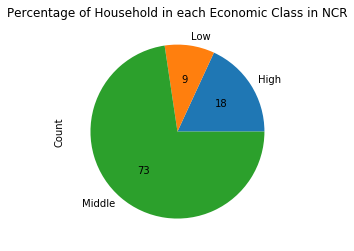

In [110]:
df_class.loc[df_class.Region == "NCR"]['Count'].plot.pie(labels=labels,autopct='%.f')
plt.title('Percentage of Household in each Economic Class in NCR')

Text(0.5, 1.0, 'Percentage of Household in each Economic Class in ARMM')

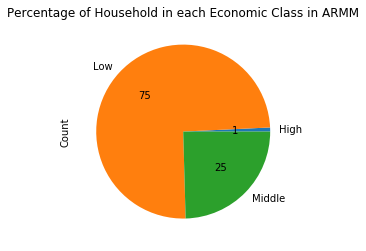

In [111]:
df_class.loc[df_class.Region == " ARMM"]['Count'].plot.pie(labels=labels,autopct='%.f')
plt.title('Percentage of Household in each Economic Class in ARMM')

Text(0.5, 1.0, 'Percentage of Household in each Economic Class in IVA - CALABARZON')

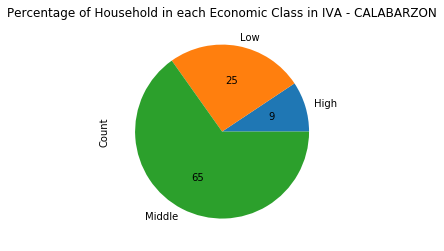

In [106]:
df_class.loc[df_class.Region == "IVA - CALABARZON"]['Count'].plot.pie(labels=labels,autopct='%.f')
plt.title('Percentage of Household in each Economic Class in IVA - CALABARZON')

Text(0.5, 1.0, 'Percentage of Household in each Economic Class in IVB - MIMAROPA')

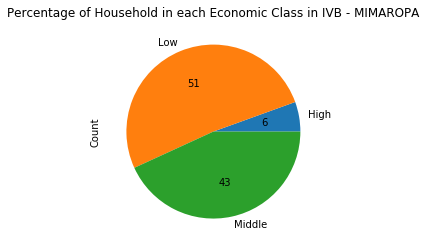

In [107]:
df_class.loc[df_class.Region == "IVB - MIMAROPA"]['Count'].plot.pie(labels=labels,autopct='%.f')
plt.title('Percentage of Household in each Economic Class in IVB - MIMAROPA')

<h3> Conclusion for type of supermarket to be built </h3>

In each region there is a certain economic class that has a high expenditure on consumption goods. We can determine the type of supermarket that will be built in the area through this.

# Q3 What types of goods should be packed in the supermarket?

## Percentage of Consumption goods for each ECONOMIC CLASS
Here, we wanted to see what type of goods each economic class spends on. 

And here we notice that the higher your economic status, the more you spend on meat.

From this data, you can't really tell if they either buy at a larger quantity or generally spend on higher value meat. Nevertheless, meat expenditure is a possible indicator of economic status.

In [34]:
df4=pd.DataFrame([df.groupby('Class')['BreadPercent'].mean(),df.groupby('Class')['RicePercent'].mean(), df.groupby('Class')['MeatPercent'].mean(), df.groupby('Class')['MarinePercent'].mean(), df.groupby('Class')['FruitPercent'].mean(), df.groupby('Class')['VegetablePercent'].mean(), df.groupby('Class')['AlcoholPercent'].mean(), df.groupby('Class')['TobaccoPercent'].mean(), df.groupby('Class')['ClothingPercent'].mean()])
df4

Class,High,Low,Middle
BreadPercent,24.790804,35.797604,30.543295
RicePercent,15.969184,24.820469,21.927205
MeatPercent,19.143252,7.880378,14.413937
MarinePercent,13.263620,13.456373,12.941112
FruitPercent,4.850640,2.924002,3.279307
VegetablePercent,6.119838,7.091006,6.250869
AlcoholPercent,1.328889,1.270604,1.400894
TobaccoPercent,1.800072,2.993836,2.900586
ClothingPercent,12.733702,3.765728,6.342795


C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, '')

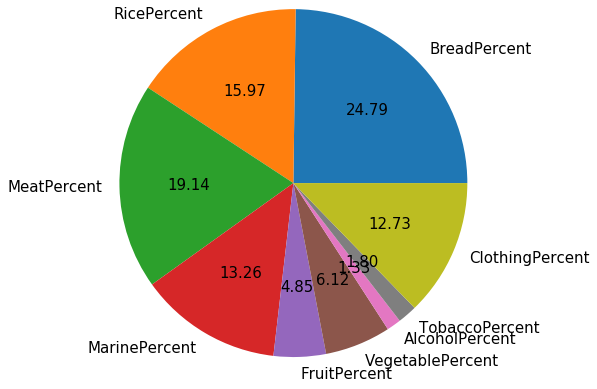

In [35]:
fig=df4["High"].plot.pie(autopct='%0.2f', radius=2,fontsize = 15)
plt.axes().set_ylabel('')

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, '')

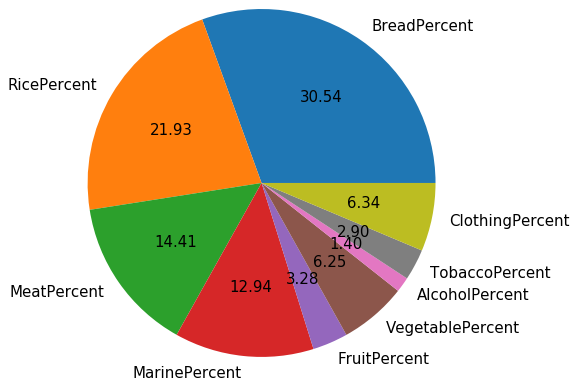

In [36]:
fig=df4["Middle"].plot.pie(autopct='%.2f', radius=2,fontsize = 15)
plt.axes().set_ylabel('')

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, '')

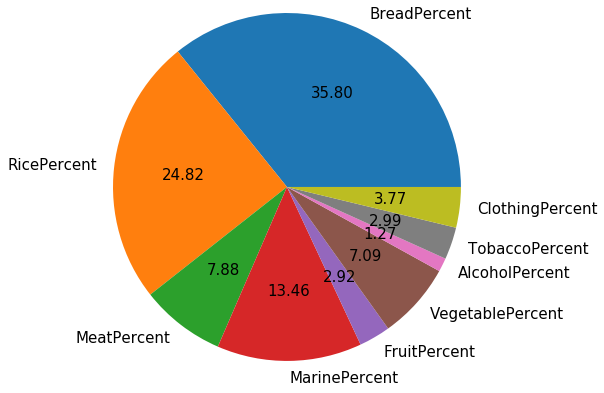

In [37]:
fig=df4["Low"].plot.pie(autopct='%.2f', radius=2, fontsize = 15)
plt.axes().set_ylabel('')

## Percentage of Consumption goods in EACH REGION

Here, we wanted to look at the composition of each consumption goods over total expenditure of consumption goods. This is primarily to observe which products are most likely or least likely spent on in each region. 

In [38]:
df3=pd.DataFrame([df.groupby('Region')['BreadPercent'].mean(),df.groupby('Region')['RicePercent'].mean(), df.groupby('Region')['MeatPercent'].mean(), df.groupby('Region')['MarinePercent'].mean(), df.groupby('Region')['FruitPercent'].mean(), df.groupby('Region')['VegetablePercent'].mean(), df.groupby('Region')['AlcoholPercent'].mean(), df.groupby('Region')['TobaccoPercent'].mean(), df.groupby('Region')['ClothingPercent'].mean()])
df3

Region,ARMM,CAR,Caraga,I - Ilocos Region,II - Cagayan Valley,III - Central Luzon,IVA - CALABARZON,IVB - MIMAROPA,IX - Zasmboanga Peninsula,NCR,V - Bicol Region,VI - Western Visayas,VII - Central Visayas,VIII - Eastern Visayas,X - Northern Mindanao,XI - Davao Region,XII - SOCCSKSARGEN
BreadPercent,35.115179,31.333347,34.871895,30.503292,29.261394,29.220107,29.682345,32.860005,37.843255,28.522140,33.400517,31.547703,36.259571,34.683259,37.813198,32.549110,33.774276
RicePercent,27.255227,24.760723,25.384280,23.404298,22.579370,20.738929,20.875145,26.806273,19.400251,18.529931,24.689582,24.515938,19.003252,27.611226,22.190336,21.088154,25.647887
MeatPercent,3.104944,13.751831,9.227817,14.482186,15.941184,16.627332,16.225985,9.180943,7.841518,17.914799,10.105405,9.706732,10.296006,9.010670,9.128327,10.992207,7.668709
MarinePercent,17.139391,9.584879,13.098703,11.560337,11.737034,12.449561,12.487149,11.850797,15.218816,12.023835,12.969604,14.499453,15.542521,12.645885,11.897595,15.689940,13.573010
FruitPercent,3.595870,3.536863,2.747815,2.815952,2.617291,3.071442,3.445400,3.281326,3.132775,4.134123,4.048538,3.314537,3.194061,2.499465,2.772839,2.996680,2.823789
VegetablePercent,7.489928,7.798544,5.941617,7.066623,8.019135,6.575437,5.841058,6.207882,7.197148,6.329699,6.305245,6.597638,6.328454,5.794315,6.187104,6.770789,6.690893
AlcoholPercent,0.118124,1.160781,0.911382,1.677787,2.295428,1.084612,1.161064,1.752653,1.184506,1.633358,1.001562,1.964757,1.573841,1.352380,1.090478,1.316385,1.350457
TobaccoPercent,2.484929,1.796345,2.456262,2.420855,2.851853,4.290774,3.633621,2.385360,2.528153,3.139371,2.494161,2.634460,2.464552,2.211604,2.455366,2.992729,3.463781
ClothingPercent,3.696409,6.276688,5.360229,6.068670,4.697311,5.941807,6.648233,5.674761,5.653577,7.772742,4.985385,5.218782,5.337742,4.191196,6.464756,5.604006,5.007199


Here it is notable that the standard deviation of Meat Percent is the highest among the consumption goods

In [39]:
df3.T.describe()

,BreadPercent,RicePercent,MeatPercent,MarinePercent,FruitPercent,VegetablePercent,AlcoholPercent,TobaccoPercent,ClothingPercent
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,32.896505,23.204753,11.247447,13.174618,3.178163,6.655383,1.331150,2.747304,5.564676
std,2.950679,2.929234,3.954024,1.893045,0.467929,0.662342,0.483141,0.600963,0.960893
min,28.522140,18.529931,3.104944,9.584879,2.499465,5.794315,0.118124,1.796345,3.696409
25%,30.503292,20.875145,9.128327,11.897595,2.815952,6.207882,1.090478,2.455366,5.007199
50%,32.860005,23.404298,10.105405,12.645885,3.132775,6.575437,1.316385,2.494161,5.604006
75%,34.871895,25.384280,14.482186,14.499453,3.445400,7.066623,1.633358,2.992729,6.068670
max,37.843255,27.611226,17.914799,17.139391,4.134123,8.019135,2.295428,4.290774,7.772742


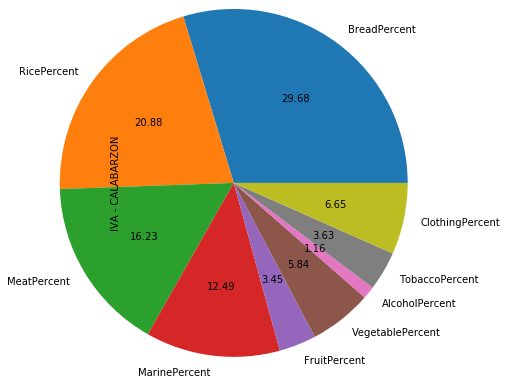

In [40]:
df3["IVA - CALABARZON"].plot.pie(autopct='%.2f', radius=2)

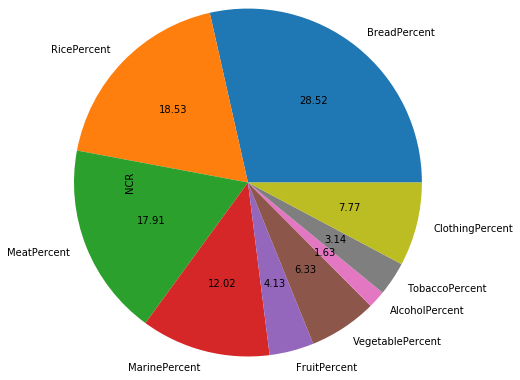

In [41]:
df3["NCR"].plot.pie(autopct='%.2f', radius=2)

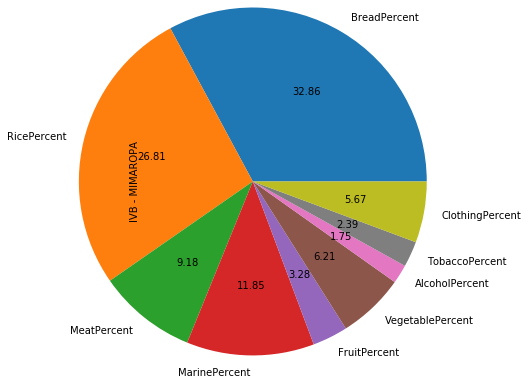

In [42]:
df3["IVB - MIMAROPA"].plot.pie(autopct='%.2f', radius=2)

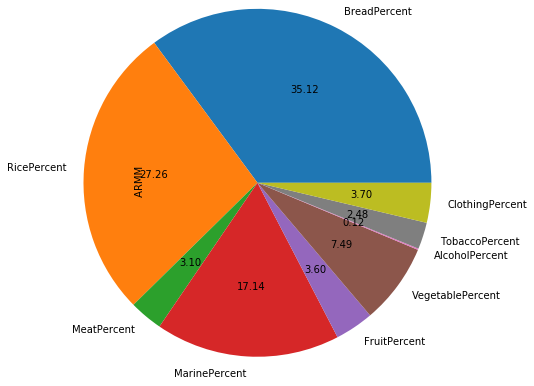

In [43]:
fig=df3[" ARMM"].plot.pie(autopct='%.2f', radius=2)

# Summary Example of ARMM

Here we use ARMM as an example. I chose it specifically because the Expenditure on Consumption Goods is greater than half of the Sum of the Total Household income of the region. This means more or less, people of ARMM spend on basic commodities.

We now see that most of the expenditure on consumption goods comes from the lower and middle class and so we must build a supermarket that must cater to mostly lower and middle income class. We need to put less imported and expensive goods on the shelves and more local goods that are cheaper. 

Finally, the pie chart shows us which products are mostly bought. We see that rice and bread have a big chunk. Next to it is marine, then vegetable products. This makes sense because culturally, people of ARMM do not really eat meat. Thus, we avoid stocking up on meat and provide more fish and vegetables as such 

Text(0.5, 1.0, 'Household Income vs. Consumption Goods for ARMM')

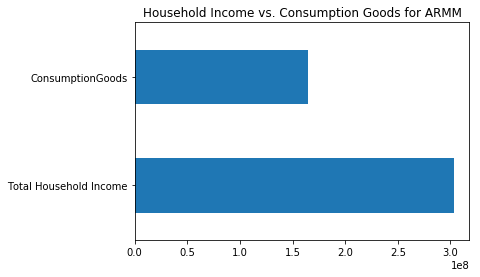

In [97]:
df.loc[df.Region==" ARMM"].agg({"Total Household Income":"sum","ConsumptionGoods":"sum"}).plot.barh()
plt.title('Household Income vs. Consumption Goods for ARMM')

Text(0.5, 1.0, 'ARMM Expenditure on Consumption Goods per Economic Class')

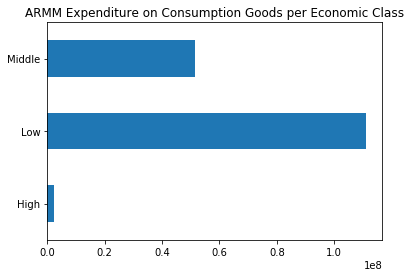

In [126]:
df_class.loc[df_class.Region==" ARMM"]['ConsumptionGoods'].plot.barh()
plt.yticks(np.arange(3),labels)
plt.title('ARMM Expenditure on Consumption Goods per Economic Class')

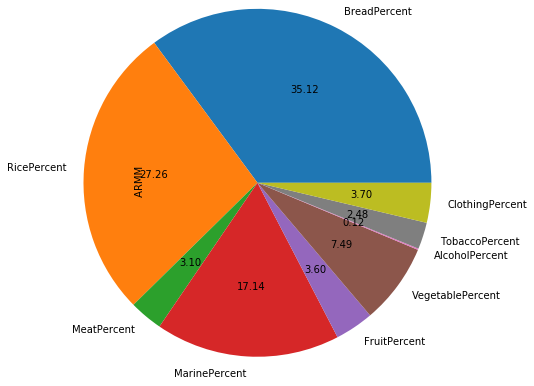

In [127]:
fig=df3[" ARMM"].plot.pie(autopct='%.2f', radius=2)

# Recommendations

If we were to construct an actual supermarket, I don't think that this data would be sufficient enough to know where would be the best place to build. 

We need more granular data and actual research on the area, to know how to satisfy customers.